Biodiversity in US National Parks
Project Scope

1. How many species per category?
2. Break-down of categories per conservation status
3. Which category is most likely to be endangered?
4. How many observations per category?
5. What's the most common animal?
6. Chi squared - sneak peek and refresher

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#creating dataframes
species_info = pd.read_csv('species_info.csv',encoding='utf-8')
species_info.drop_duplicates(keep='first', inplace=True)
observations = pd.read_csv('observations.csv',encoding='utf-8')
observations.drop_duplicates(keep='first', inplace=True)

### Inspecting 'species_info.csv'

'species_info.csv' consists pf 5824 entries and describes animals and plants by listing their (1) category, (2) scientific name, (3) common name(s) and (4) their conservation status. Some initial insights:
* the conservation status has a lot of null values
* some scientific names are duplicated (5541 unique scientific names vs. 5824 entries in the dataset)

In [19]:
print('##################################')
print('General info:')
print(species_info.info())
print('##################################')
print('Column names and data types:')
print(species_info.dtypes)
print('##################################')
print('Number of rows and columns:')
print(species_info.shape)
print('##################################')
print('Conservation status values:')
print(species_info.conservation_status.unique())
print('##################################')
print('Animal/plant categories:')
print(species_info.category.unique())
print('##################################')
print('How many animals/plants')
print(len(observations.scientific_name.unique()))
print('##################################')
print('Sample of the dataframe:')
species_info.head()


##################################
General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
##################################
Column names and data types:
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
##################################
Number of rows and columns:
(5824, 4)
##################################
Conservation status values:
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
##################################
Animal/plant categories:
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fis

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


According to the information provided along with the dataset, the missing information about the conservation status denotes the species is of no concern. The nan values have thus been filled as "Species of no concern". Additionally, the conservation status values have been reorganized into ordered categories with "Endangared" at the bottom and "Species of no concern" at the top.

In [4]:
#filling in nans
species_info['conservation_status'] = species_info['conservation_status'].fillna('Species of no concern')

#creating categorical data out of conservation status
species_info["conservation_status"] = species_info["conservation_status"].astype("category")
species_info["conservation_status"].cat.reorder_categories(['Endangered', 'Threatened', 'Species of Concern', 'In Recovery', 'Species of no concern'], ordered=True)
species_info.sort_values(by='conservation_status', inplace=True, ascending=True)

#checking uniques
print(species_info.conservation_status.unique())

['Endangered', 'In Recovery', 'Species of Concern', 'Species of no concern', 'Threatened']
Categories (5, object): ['Endangered', 'In Recovery', 'Species of Concern', 'Species of no concern', 'Threatened']


The duplicated scientific names are due to inconsistent use of common names, as seen below. These entries will stay as is and should not affect our analysis.

In [5]:
species_info['duplicate'] = species_info.duplicated(subset=['scientific_name'],keep=False)
#creating a temporary df with only duplicate entries
species_info_dup = species_info[species_info.duplicate == True].reset_index()
#dropping the duplicate column from the main df
species_info.drop(labels='duplicate', axis=1, inplace=True)
species_info_dup.sort_values(by='scientific_name', inplace=True, ascending=False)
#checking a few duplicated entries
species_info_dup.head(10)


,index,category,scientific_name,common_names,conservation_status,duplicate
429,632,Vascular Plant,Zizia aptera,Golden Alexanders,Species of no concern,True
132,3347,Vascular Plant,Zizia aptera,"Heartleaf Alexanders, Heart-Leaf Alexanders, M...",Species of no concern,True
487,2331,Vascular Plant,Vulpia octoflora,Annual Fescue,Species of no concern,True
89,4290,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",Species of no concern,True
237,5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",Species of no concern,True
488,2330,Vascular Plant,Vulpia myuros,Rattail Fescue,Species of no concern,True
246,5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",Species of no concern,True
489,2329,Vascular Plant,Vulpia bromoides,Fescue,Species of no concern,True
111,3231,Bird,Vireo solitarius,Blue-Headed Vireo,Species of no concern,True
398,328,Bird,Vireo solitarius,"Blue-Headed Vireo, Solitary Vireo",Species of no concern,True


In [8]:
def kingdom_check(x):
    if x in ['Vascular Plant', 'Nonvascular Plant']:
        return 'Plant'
    else:
        return 'Animal'
species_info['Kingdom'] = species_info.category.apply(kingdom_check)
species_info.head()

,category,scientific_name,common_names,conservation_status,Kingdom
276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered,Animal
173,Bird,Grus americana,Whooping Crane,Endangered,Animal
34,Mammal,Myotis grisescens,Gray Myotis,Endangered,Animal
3275,Fish,Chasmistes liorus,June Sucker,Endangered,Animal
4601,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered,Animal


### Inspecting 'observations.csv'

'observations.csv' lists sightings of individual species including (1) their scientific name, (2) the park name that reported the sightings, (3) the total number of reported sightings (i.e. observations) for the given entry. No modifications of the dataset are necessary.

In [29]:
#taking a first look at the observations df
print('##################################')
print('General info:')
print(observations.info())
print('##################################')
print('Column names and data types:')
print(observations.dtypes)
print('##################################')
print('Number of rows and columns:')
print(observations.shape)
print('##################################')
print('List park names')
print(observations.park_name.unique())
print('##################################')
print('The number of unique scientific_names is equal between the two DFs:')
print(len(species_info.scientific_name.unique())==len(observations.scientific_name.unique()))
print('##################################')
print('Sample of the DF:')
observations.head()


##################################
General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
##################################
Column names and data types:
scientific_name    object
park_name          object
observations        int64
dtype: object
##################################
Number of rows and columns:
(23296, 3)
##################################
List park names
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
##################################
Checking if the number of unique scientific_names is equal between the two DFs
True
##################################
Sample of 

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


# Analysis
## Species per category

In [9]:
species_info.shape[0]
species_grouping = species_info.groupby('category').size().reset_index()
species_grouping.columns= ['category', 'Count']
species_grouping['Percentage'] = species_grouping.Count / species_info.shape[0] * 100
species_grouping

,category,Count,Percentage
0,Amphibian,80,1.373626
1,Bird,521,8.945742
2,Fish,127,2.180632
3,Mammal,214,3.674451
4,Nonvascular Plant,333,5.717720
5,Reptile,79,1.356456
6,Vascular Plant,4470,76.751374


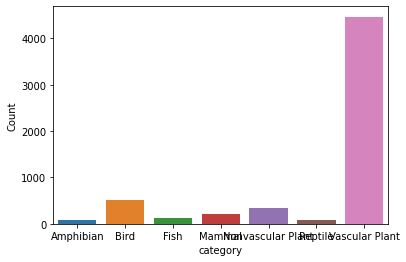

<Figure size 432x288 with 0 Axes>

In [10]:
sns.barplot(data=species_grouping, x="category", y='Count')
plt.show()
plt.clf()

In [11]:
species_grouping_animals = species_info[species_info.Kingdom =='Animal'].groupby('category').size().reset_index()
species_grouping_animals.columns= ['category', 'Count']
species_grouping_animals['Percentage'] = species_grouping_animals.Count / species_info[species_info.Kingdom =='Animal'].shape[0] * 100
species_grouping_animals

,category,Count,Percentage
0,Amphibian,80,7.835455
1,Bird,521,51.028404
2,Fish,127,12.438786
3,Mammal,214,20.959843
4,Reptile,79,7.737512


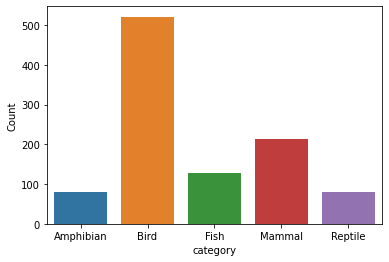

<Figure size 432x288 with 0 Axes>

In [12]:
sns.barplot(data=species_grouping_animals, x="category", y='Count')
plt.show()
plt.clf()

In [13]:
species_grouping_plants = species_info[species_info.Kingdom =='Plant'].groupby('category').size().reset_index()
species_grouping_plants.columns= ['category', 'Count']
species_grouping_plants['Percentage'] = species_grouping_plants.Count / species_info[species_info.Kingdom =='Plant'].shape[0] * 100
species_grouping_plants

,category,Count,Percentage
0,Nonvascular Plant,333,6.933167
1,Vascular Plant,4470,93.066833


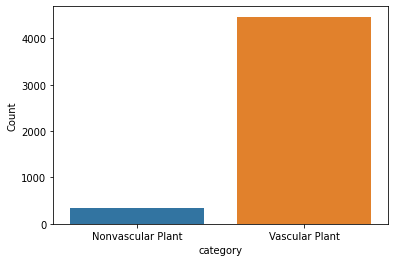

<Figure size 432x288 with 0 Axes>

In [14]:
sns.barplot(data=species_grouping_plants, x="category", y='Count')
plt.show()
plt.clf()

## Categories per conservation status

In [15]:

species_info['IsProtected'] = species_info.conservation_status != 'Species of no concern'
species_grouping = species_info.groupby(['category','IsProtected']).scientific_name.nunique().reset_index()\
                        .pivot(columns='IsProtected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
species_grouping.columns = ['Category', 'Not Protected', 'Protected']
species_grouping['% of protected'] = species_grouping.Protected / (species_grouping.Protected + species_grouping['Not Protected']) * 100

species_grouping

,Category,Not Protected,Protected,% of protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [29]:
#needed to bring back the object category to the conservation status
species_info["conservation_status"] = species_info["conservation_status"].astype("object")
cat_per_cons_status = species_info[species_info.conservation_status != 'Species of no concern']\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

cat_per_cons_status

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


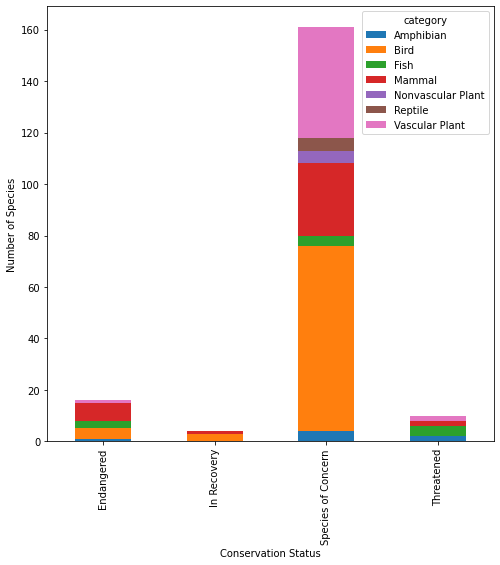

In [36]:
ax = cat_per_cons_status.plot(kind = 'bar', figsize=(8,8), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

## Analysis of park observations

In [10]:
all_data = pd.merge(
    left = observations,
    right = species_info,
    left_on = 'scientific_name',
    right_on = 'scientific_name',
    how='left')

print(all_data.head())
print(all_data.info())

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category conservation_status  
0            68  Vascular Plant             no info  
1            77          Mammal             no info  
2           138  Vascular Plant             no info  
3            84  Vascular Plant             no info  
4            85  Vascular Plant             no info  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23281 entries, 0 to 23280
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   scientific_name      23281 non-null  object  
 1   p

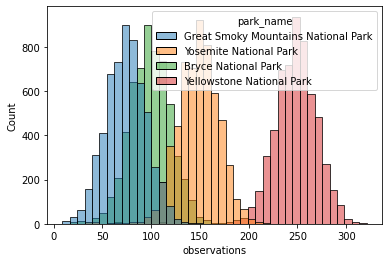

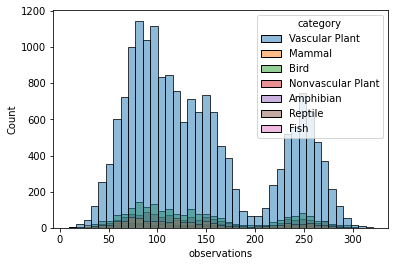

<Figure size 432x288 with 0 Axes>

In [12]:
#check the shape of observations


sns.histplot(data=all_data, x='observations', hue='park_name')
plt.show()
plt.clf()

sns.histplot(data=all_data, x='observations', hue='category')
plt.show()
plt.clf()




                             park_name  observations
0                  Bryce National Park          5823
1  Great Smoky Mountains National Park          5818
2            Yellowstone National Park          5819
3               Yosemite National Park          5821


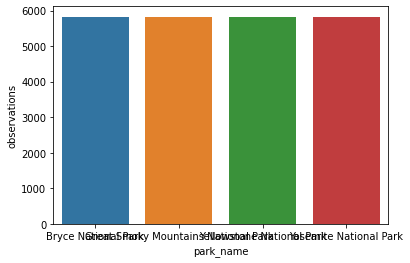

                             park_name  observations
0                  Bryce National Park     98.901082
1  Great Smoky Mountains National Park     74.145411
2            Yellowstone National Park    247.862863
3               Yosemite National Park    148.228139


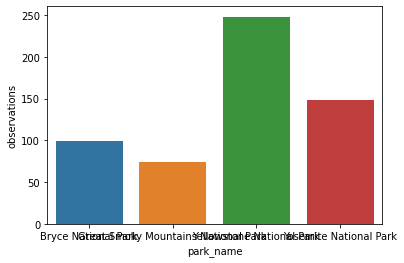

                             park_name  observations
0                  Bryce National Park        575901
1  Great Smoky Mountains National Park        431378
2            Yellowstone National Park       1442314
3               Yosemite National Park        862836


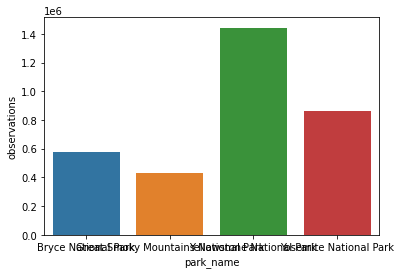

<Figure size 432x288 with 0 Axes>

In [14]:
#check how many entries per park

#no. of entries
df_counts = observations.drop("scientific_name", axis = 1).groupby("park_name").count().reset_index()
print(df_counts)
sns.barplot(data=df_counts, x="park_name", y='observations')
plt.show()
plt.clf()
#mean no. of observations
df_means = observations.drop("scientific_name", axis = 1).groupby("park_name").mean().reset_index()
print(df_means)
sns.barplot(data=df_means, x="park_name", y='observations')
plt.show()
plt.clf()

#total no. of observations
df_sums = observations.drop("scientific_name", axis = 1).groupby("park_name").sum().reset_index()
print(df_sums)
sns.barplot(data=df_sums, x="park_name", y='observations')
plt.show()
plt.clf()


            category  observations
0          Amphibian           320
1               Bird          2083
2               Fish           508
3             Mammal           855
4  Nonvascular Plant          1332
5            Reptile           316
6     Vascular Plant         17867


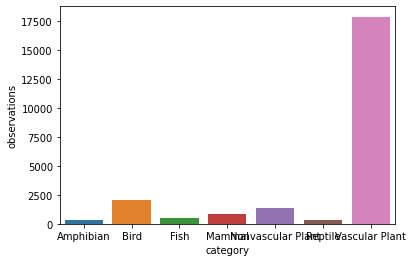

            category  observations
0          Amphibian         43971
1               Bird        292578
2               Fish         70818
3             Mammal        116440
4  Nonvascular Plant        190653
5            Reptile         44678
6     Vascular Plant       2553291


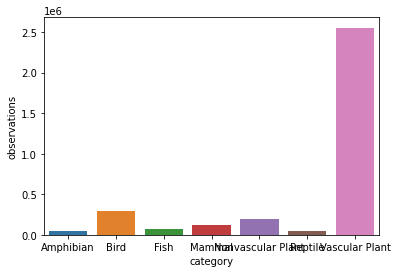

            category  observations
0          Amphibian    137.409375
1               Bird    140.459914
2               Fish    139.405512
3             Mammal    136.187135
4  Nonvascular Plant    143.132883
5            Reptile    141.386076
6     Vascular Plant    142.905412


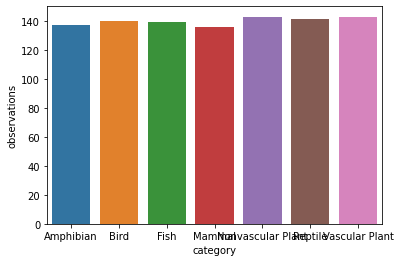

<Figure size 432x288 with 0 Axes>

In [23]:
#check % of different animal categories in the total number of entries
df_counts = all_data.drop(["scientific_name", "park_name", "conservation_status"], axis = 1).groupby("category").count().reset_index()
print(df_counts)
sns.barplot(data=df_counts, x="category", y='observations')
plt.show()
plt.clf()

#check % of different animal categories in the total number of entries
df_counts = all_data.drop(["scientific_name", "park_name", "conservation_status"], axis = 1).groupby("category").sum().reset_index()
print(df_counts)
sns.barplot(data=df_counts, x="category", y='observations')
plt.show()
plt.clf()

#mean no. of observations
df_counts = all_data.drop(["scientific_name", "park_name", "conservation_status"], axis = 1).groupby("category").mean().reset_index()
print(df_counts)
sns.barplot(data=df_counts, x="category", y='observations')
plt.show()
plt.clf()



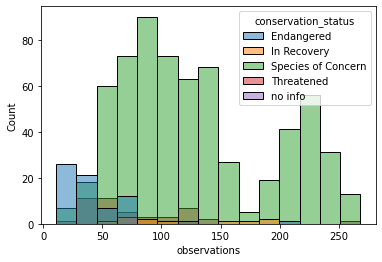

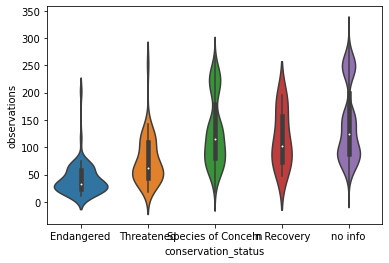

In [35]:
#check relationship between status and observations


sns.histplot(x = 'observations', data = all_data[all_data.conservation_status != 'no info'], hue='conservation_status')
plt.show()
plt.clf()
sns.violinplot(x='conservation_status', y='observations', data = all_data, order=['Endangered', 'Threatened', 'Species of Concern', 'In Recovery', 'no info'])
plt.show()




In [ ]:
#check relationship between status and park


status = all_data.conservation_status
parks = all_data.park_name.unique()
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(parks, men_means, width, label='Men')
ax.bar(parks, women_means, width, bottom=men_means,
       label='Women')


#check relationship between status and animal category